In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


sns.set_theme(style="whitegrid")

## Loading Data
Loading in simple datasets
1. Overall team error data: foul call mistakes that have hurt & benefitted teams.
2. Player incorrect no call data: individual player foul data, where a call was missed, hurting said player.
2. Player incorrect call data: individual player foul data, where a foul called was an incorrect call.

In [128]:
team_error_data = pd.read_csv("../data/insights/team_errors.csv")
player_non_call_data = pd.read_csv("../data/insights/player_incorrect_non_calls.csv")
player_bad_foul_data = pd.read_csv("../data/insights/player_incorrect_fouls.csv")
officiating_error_data = pd.read_csv("../data/insights/officiating_errors.csv")
officiating_team_assistive = pd.read_csv("../data/insights/ref_team_assist.csv")
officiating_team_harmful = pd.read_csv("../data/insights/ref_team_harms.csv")
officiating_team_delta = pd.read_csv("../data/insights/ref_team_delta.csv")
dated_ref_errors = pd.read_csv("../data/insights/dated_ref_errors.csv")

## Visualizing the teams that benefitted the least/most from officiating errors
- We notice that the Nuggets have the largest delta in calls that were incorrect and went against them.
- The Lakers have been the greatest beneficiary of incorrect foul calls from NBA games this year.


Text(0.5, 1.0, 'Teams Most Impacted by Officiating Errors (Positively & Negatively) (L2M)')

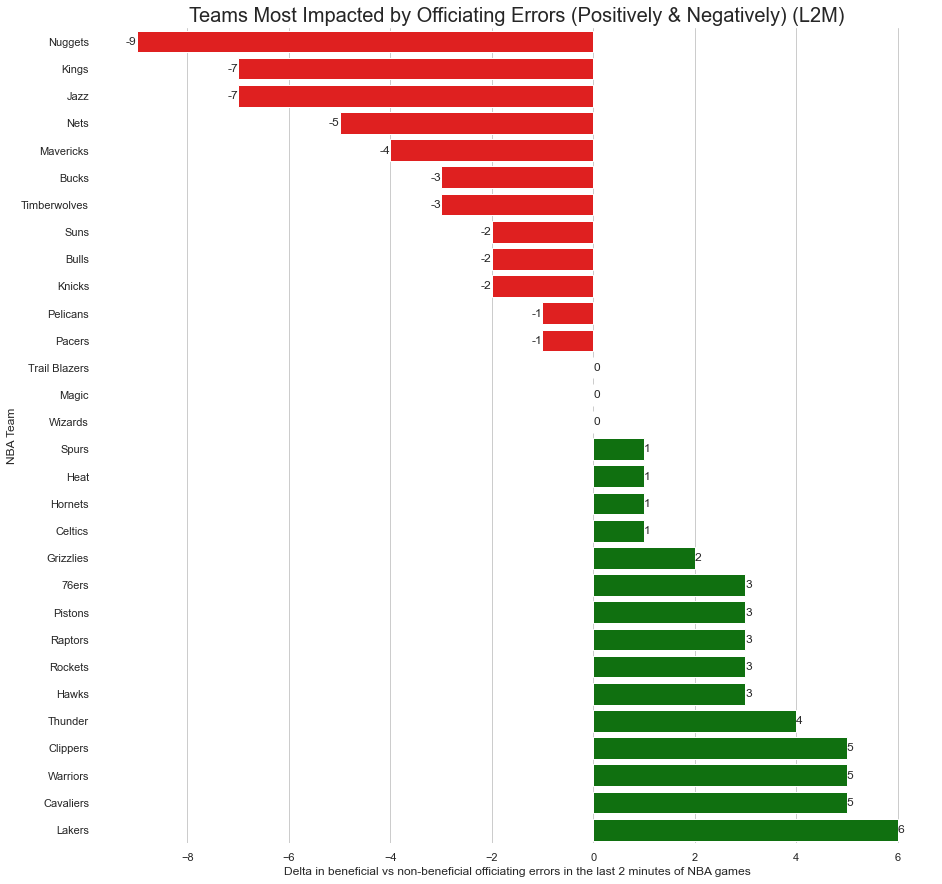

In [110]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

cols = ['red' if x < 0 else 'green' for x in team_error_data.errorDelta]
sns.barplot(x="errorDelta", y="teamName", data=team_error_data,
            label="Total", palette=cols)

# Add a legend and informative axis label
ax.set(ylabel="NBA Team",
       xlabel="Delta in beneficial vs non-beneficial officiating errors in the last 2 minutes of NBA games")
ax.bar_label(ax.containers[0])
sns.despine(left=True, bottom=True)
plt.title('Teams Most Impacted by Officiating Errors (Positively & Negatively) (L2M)', fontsize=20)

Text(0.5, 1.0, 'Average Number of Officiating Errors of 3-person crew (official is a member of crew) by Official (L2M)')

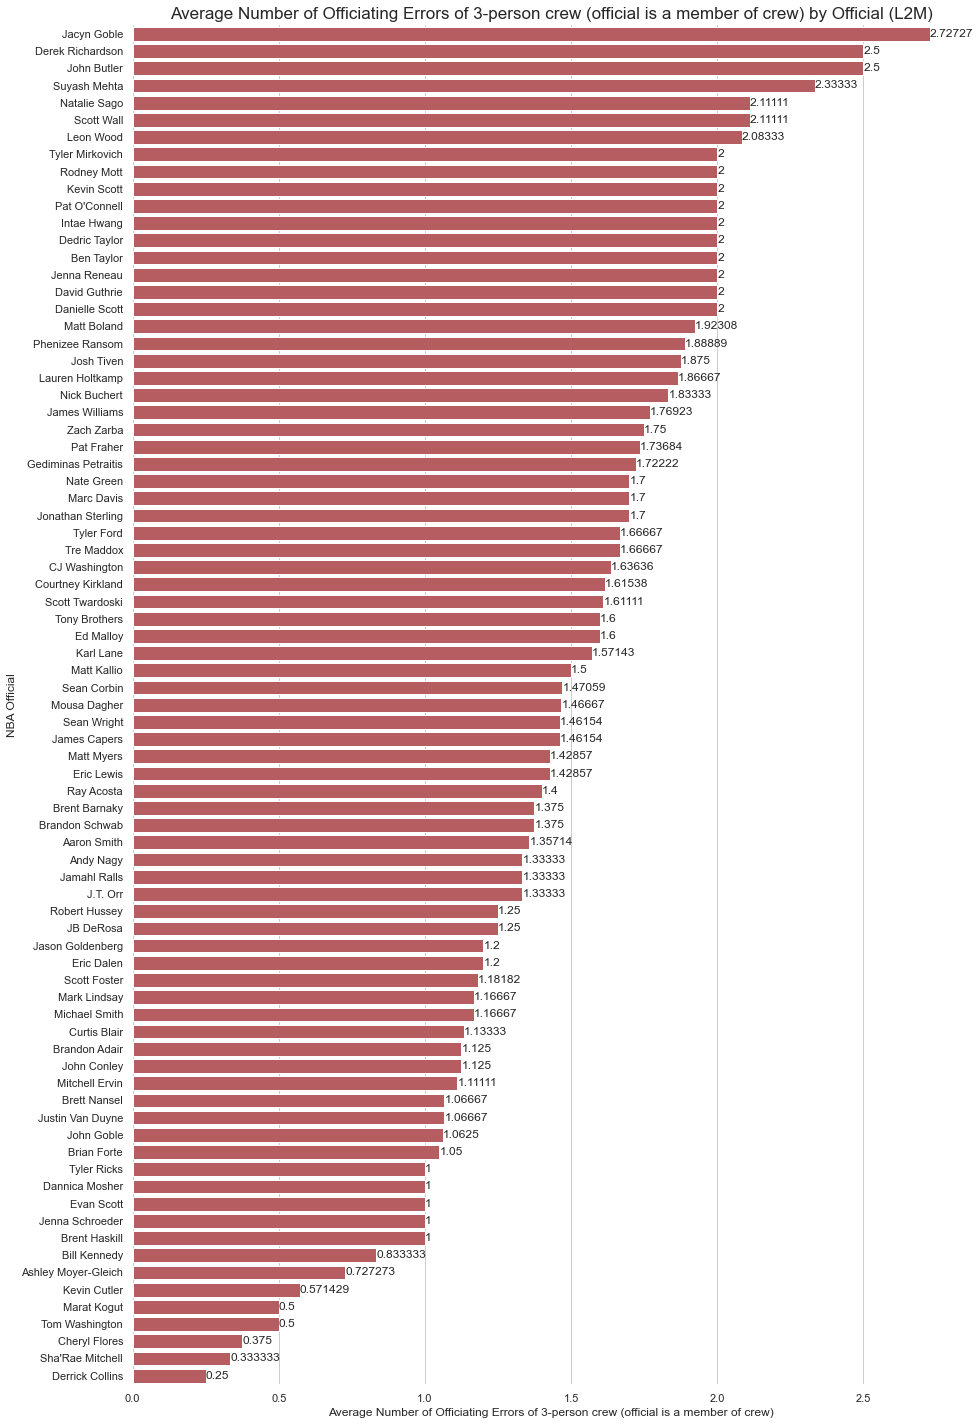

In [111]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 25))

sns.barplot(x="errorsPerGame", y="name", data=officiating_error_data,
            label="Errors Per Game", color="r")

# Add a legend and informative axis label
ax.set(ylabel="NBA Official",
       xlabel="Average Number of Officiating Errors of 3-person crew (official is a member of crew)")
ax.bar_label(ax.containers[0])

sns.despine(left=True, bottom=True)
plt.title('Average Number of Officiating Errors of 3-person crew (official is a member of crew) by Official (L2M)', fontsize=17)

Text(0.5, 1.0, 'Heatmap of officials commiting helpful errors for a particular team (L2M)')

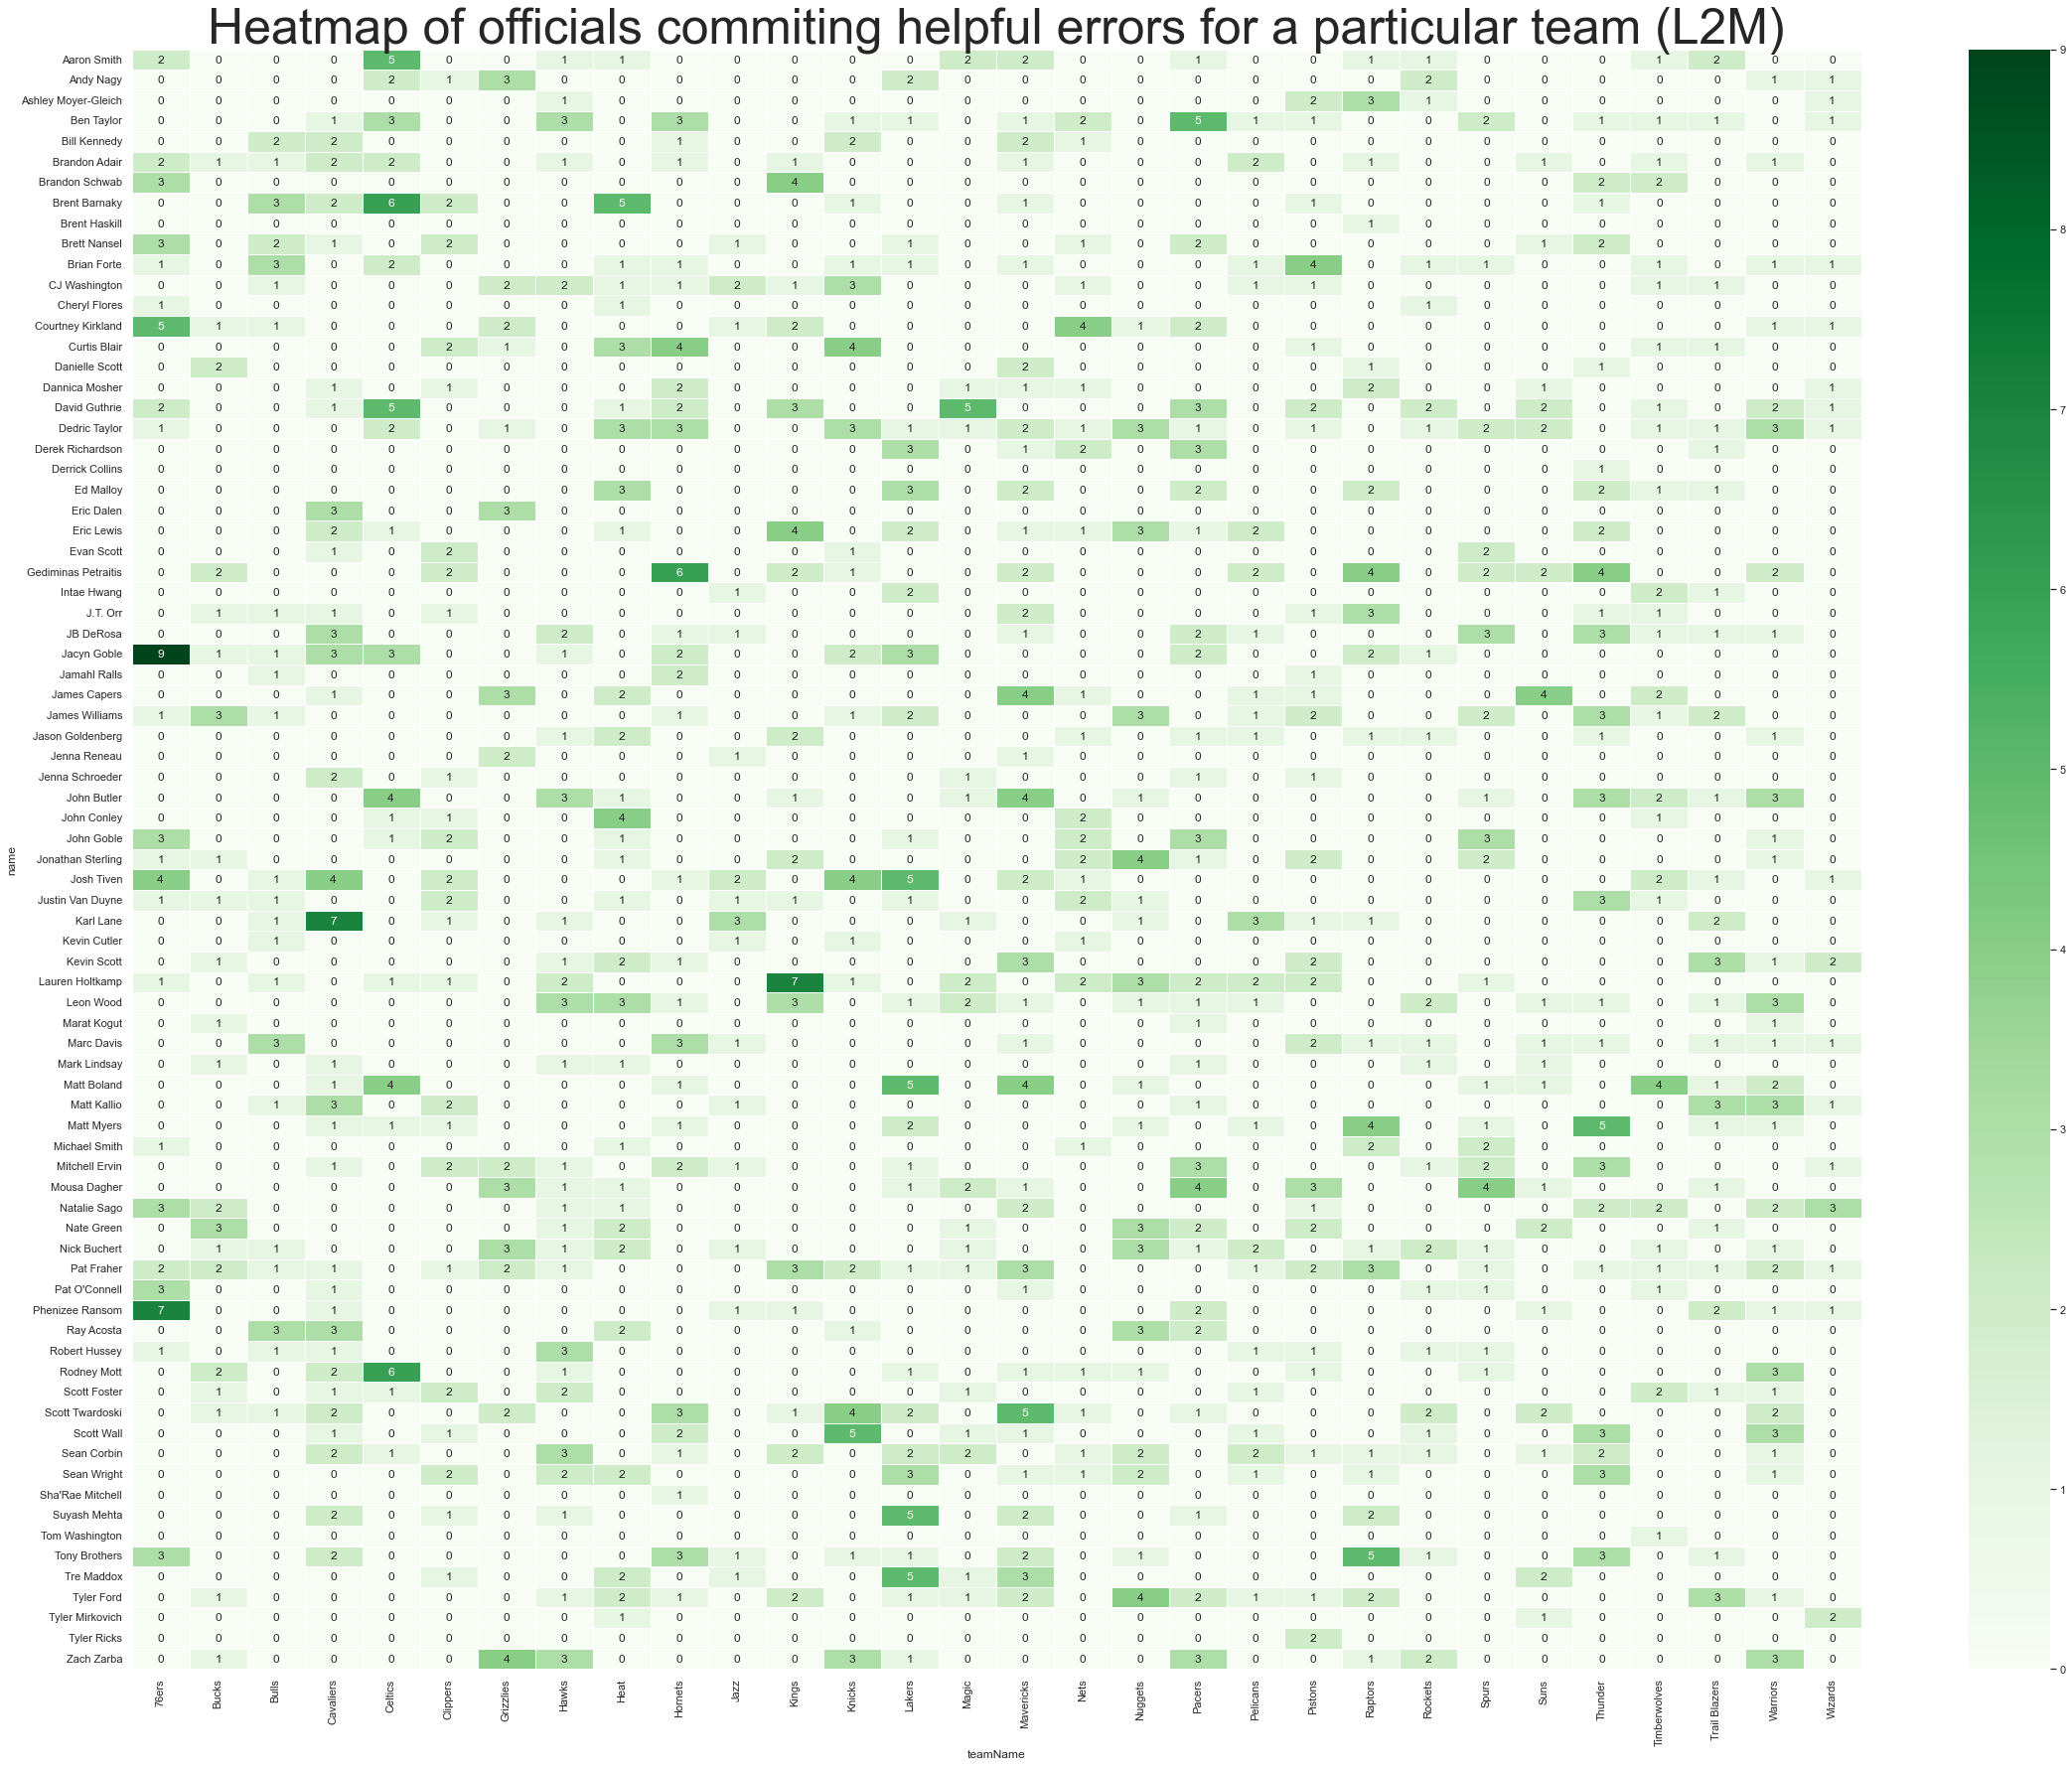

In [112]:
pivoted_assistive = officiating_team_assistive.pivot("name", "teamName", "errorsInFavor").fillna(0)
for col in pivoted_assistive.columns:
    pivoted_assistive[col] = pivoted_assistive[col].astype(np.int64)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(39, 30))
sns.heatmap(pivoted_assistive, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="Greens")

plt.title('Heatmap of officials commiting helpful errors for a particular team (L2M)', fontsize=50)

Text(0.5, 1.0, 'Heatmap of officials commiting harmful errors for a particular team (L2M)')

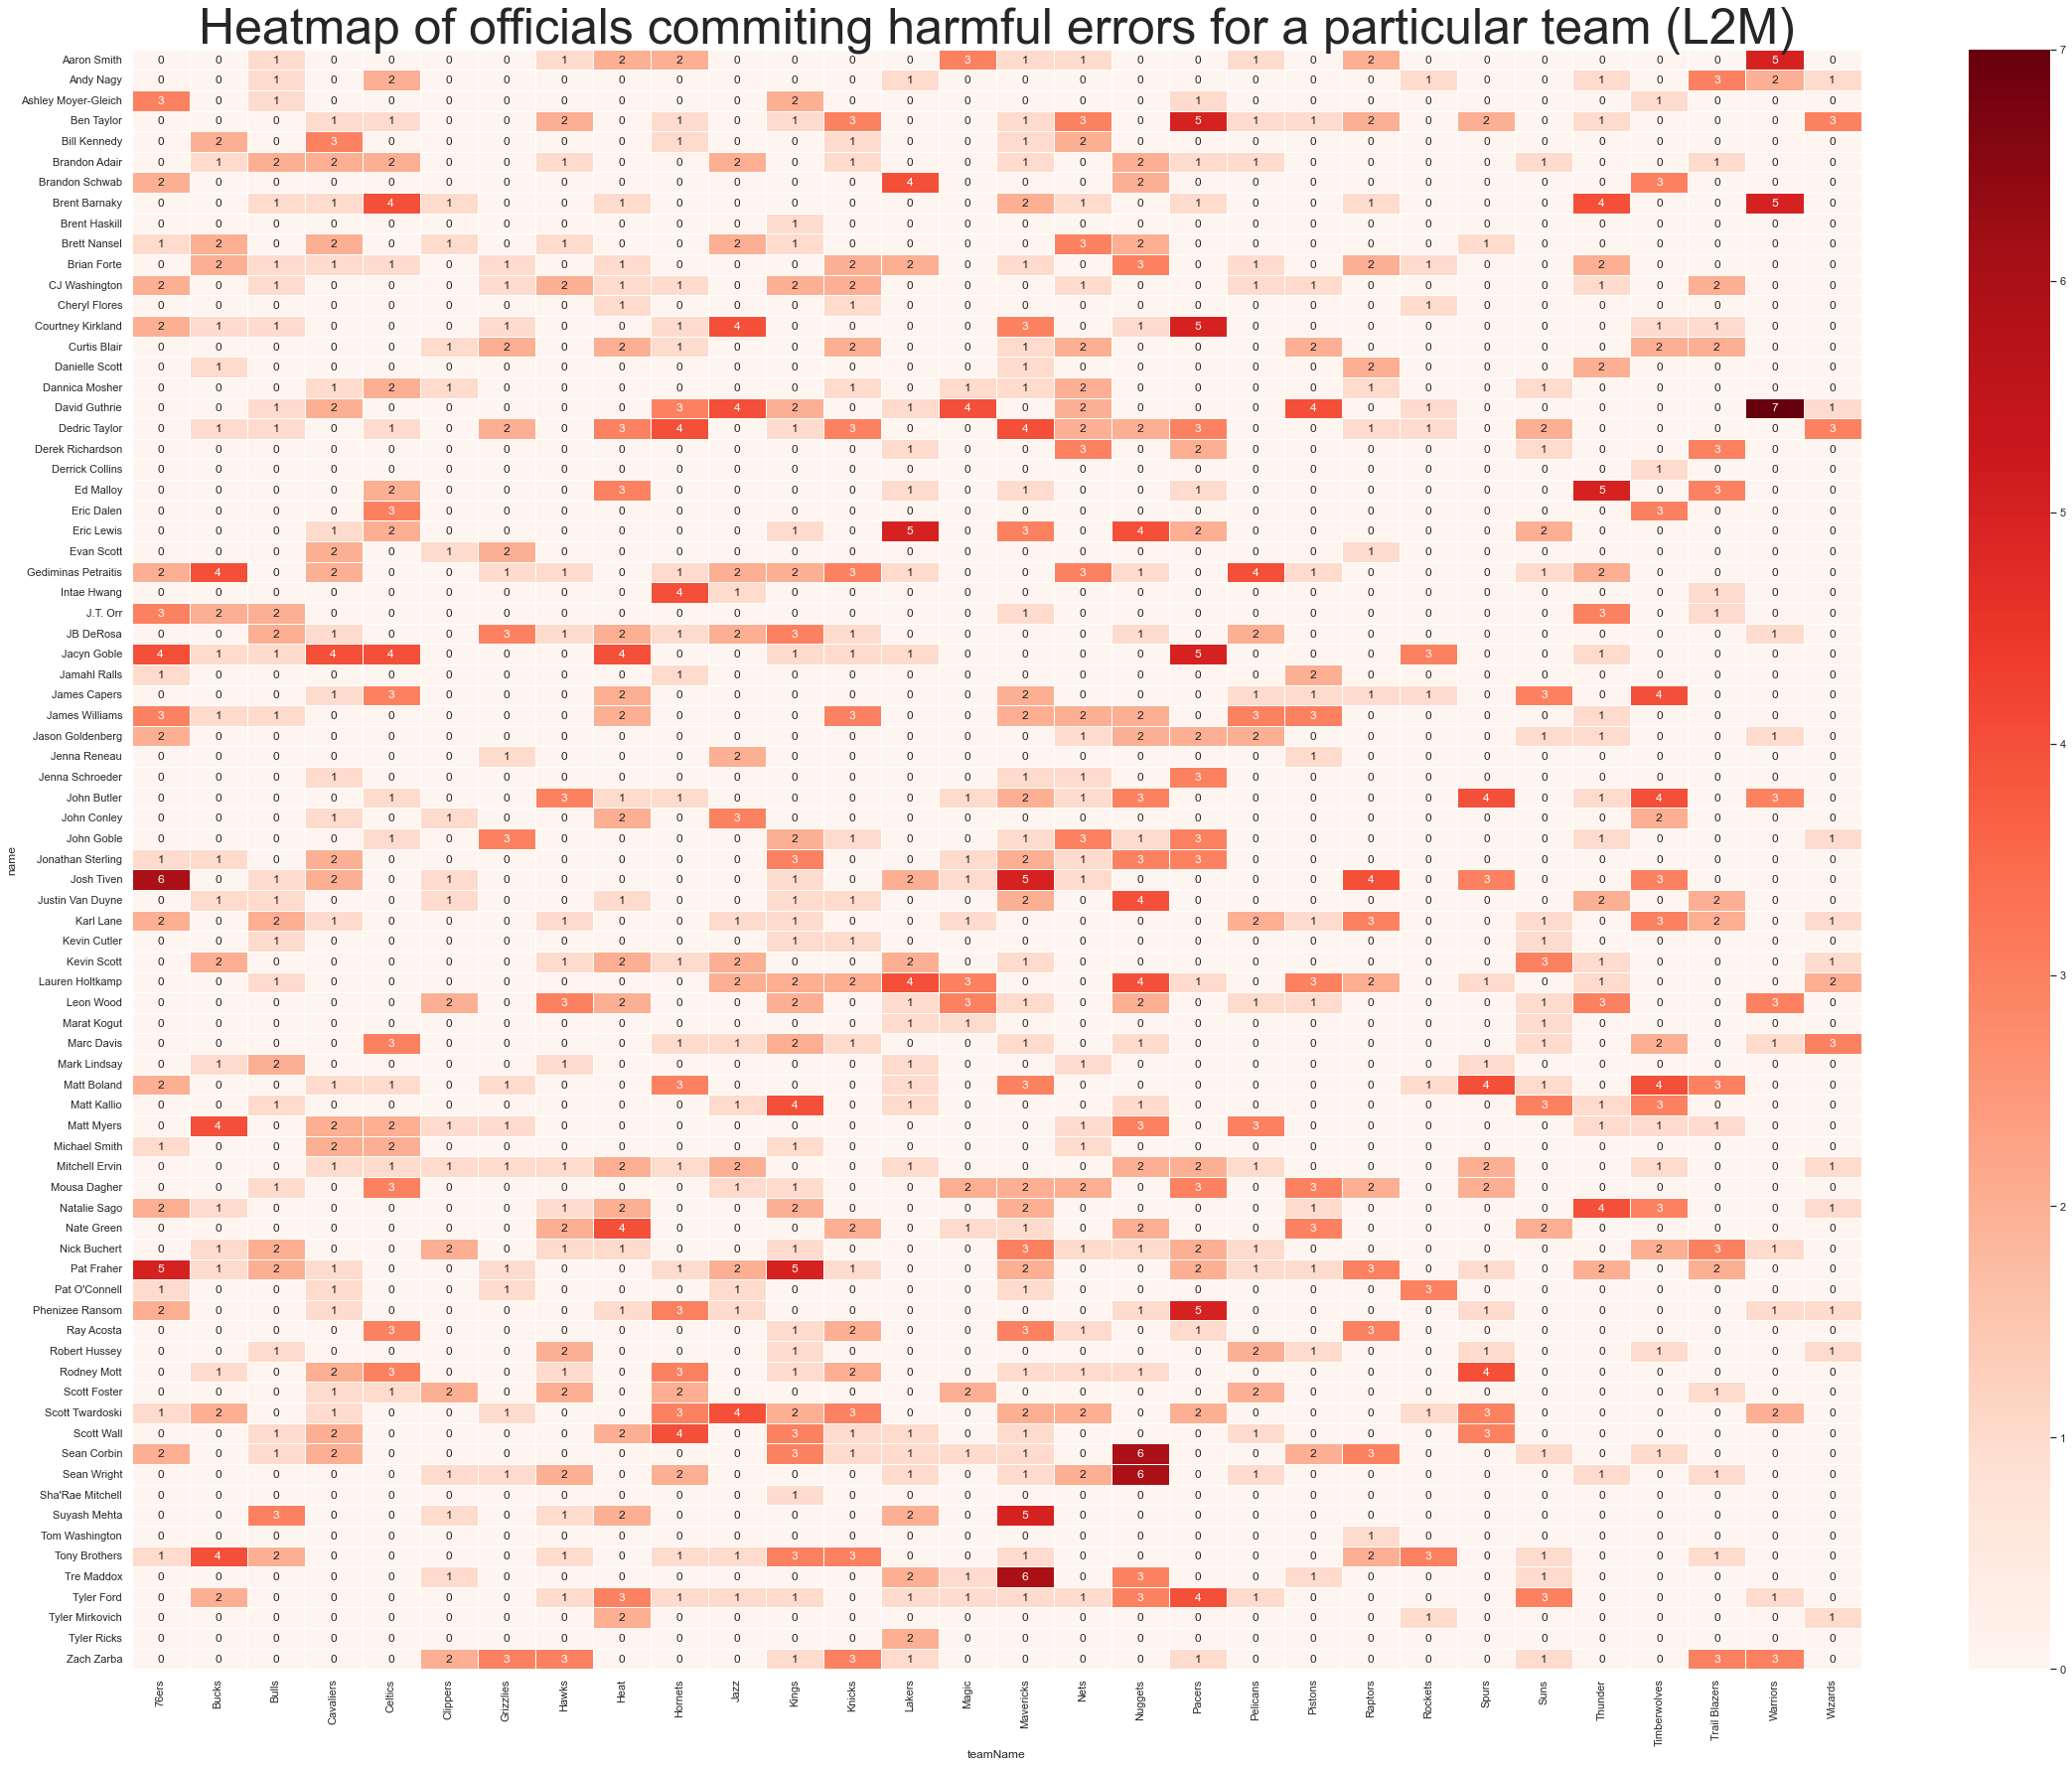

In [113]:
pivoted_harmful = officiating_team_harmful.pivot("name", "teamName", "errorsAgainst").fillna(0)
for col in pivoted_harmful.columns:
    pivoted_harmful[col] = pivoted_harmful[col].astype(np.int64)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(39, 30))
sns.heatmap(pivoted_harmful, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="Reds")
plt.title('Heatmap of officials commiting harmful errors for a particular team (L2M)', fontsize=50)

Text(0.5, 1.0, 'Heatmap of officials net error impact for a particular team (L2M)')

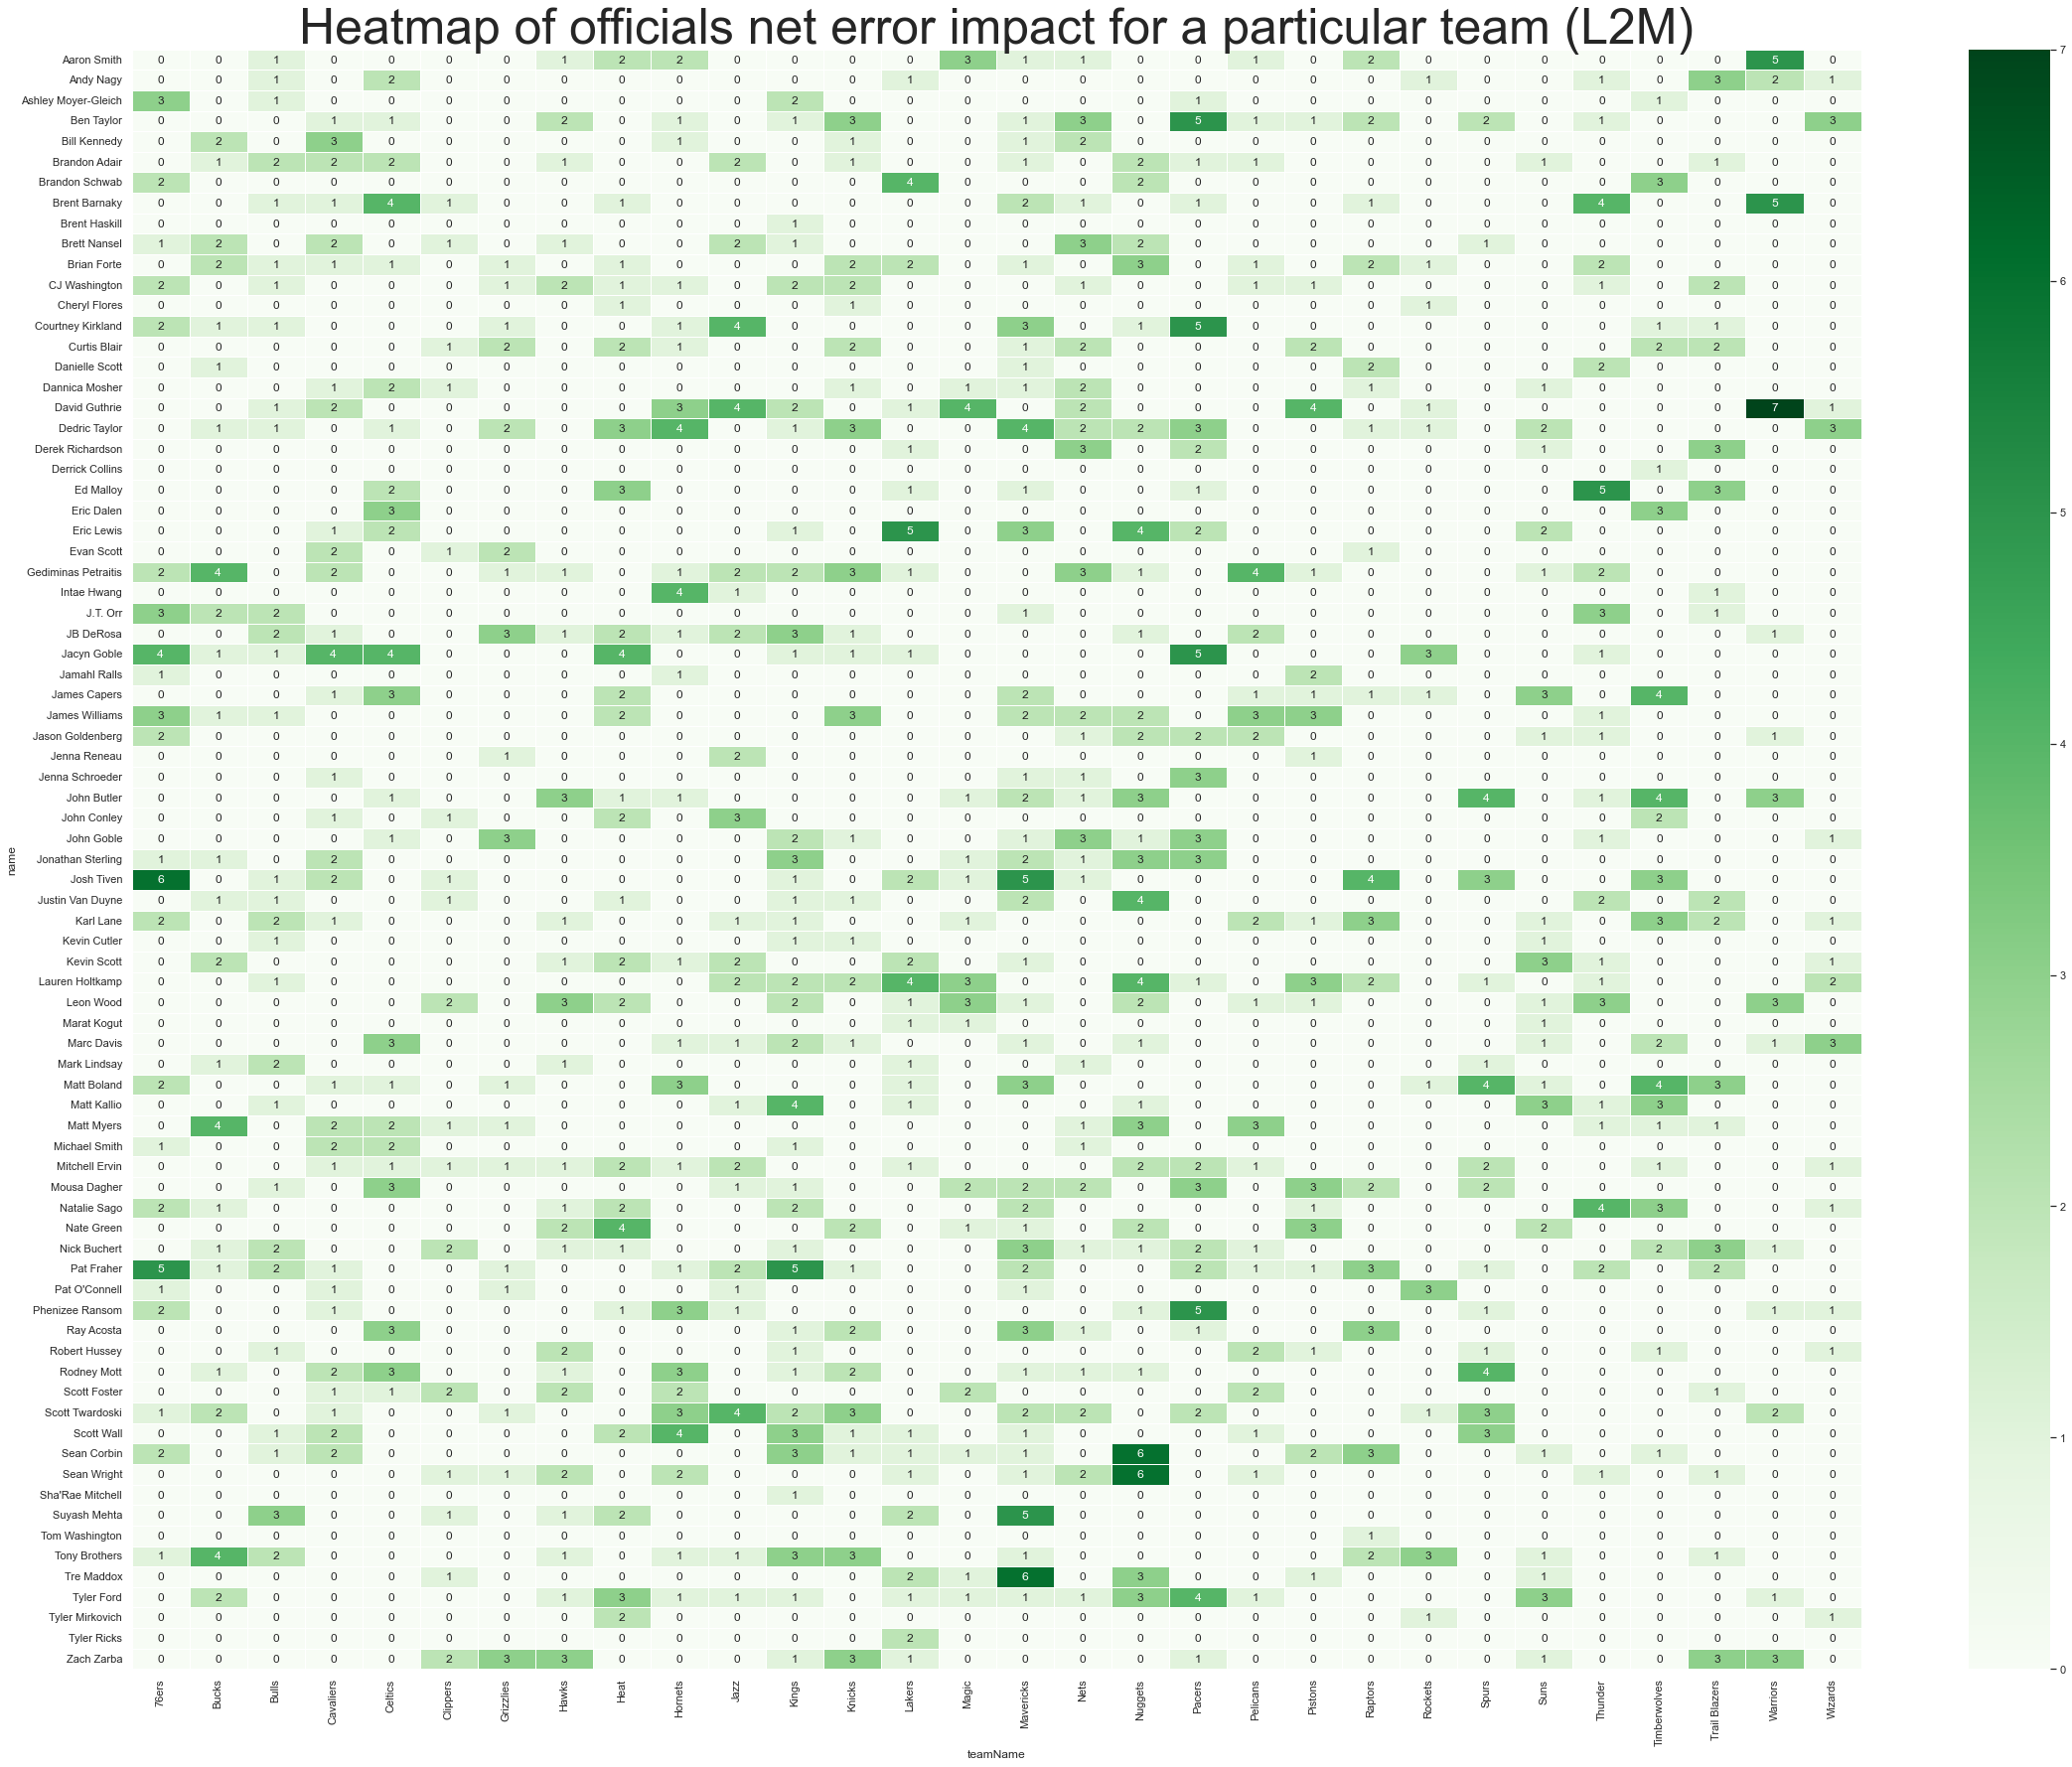

In [124]:
pivoted_delta = officiating_team_delta.pivot("name", "teamName", "errorDelta").fillna(0)
for col in pivoted_delta.columns:
    pivoted_delta[col] = pivoted_delta[col].astype(np.int64)

# Generate a custom diverging colormap
cols = ['red' if x < 0 else 'green' for x in officiating_team_delta.errorDelta]


# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(39, 30))
sns.heatmap(pivoted_harmful, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="Greens")
plt.title('Heatmap of officials net error impact for a particular team (L2M)', fontsize=50)

#### Building timelines for referee errors (top 10 most erroneous referees)

In [227]:
erroneous_refs = list(dated_ref_errors.groupby(
    "name"
).sum()["errors"].sort_values(ascending=False).to_frame().reset_index()["name"][:20])

bad_ref_data = dated_ref_errors.loc[dated_ref_errors["name"].isin(erroneous_refs)]
bad_ref_data['gameDate']= pd.to_datetime(bad_ref_data['gameDate'])
# restructure bad ref data for densities
dense_bad_ref_data = []

for rec in bad_ref_data.to_dict("records"):
    for i in range(rec["errors"]):
        dense_bad_ref_data.append(
            {
                "name": rec["name"],
                "date": rec["gameDate"]
            }
        )

dense_ref_data = pd.DataFrame(dense_bad_ref_data)


/opt/anaconda3/envs/qai-python-lambdas/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0.98, 'Density of officiating errors for 2022-2023 season for 20 most erroneous officials')

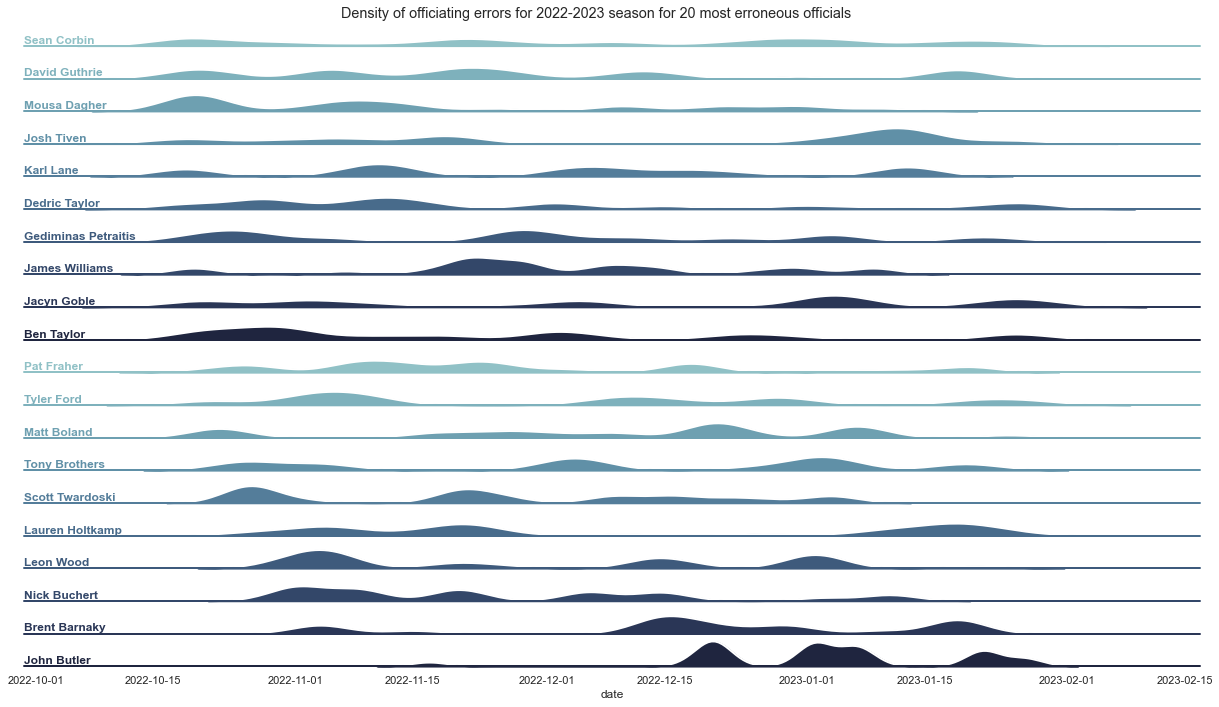

In [232]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(dense_ref_data, row="name", hue="name", aspect=35, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "date",
      bw_adjust=.25, clip_on=False,
      fill=True, alpha=1, linewidth=1.5, thresh=0.01)
g.map(sns.kdeplot, "date", clip_on=False, color="w", lw=2, bw_adjust=.25)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "date")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.fig.suptitle('Density of officiating errors for 2022-2023 season for 20 most erroneous officials')
